In [1]:
import pandas as pd

In [2]:
cd C:\Users\ajinkya.patil\OneDrive - Prime Boiler Services Ltd\Desktop\Python\stack-overflow-developer-survey-2020

C:\Users\ajinkya.patil\OneDrive - Prime Boiler Services Ltd\Desktop\Python\stack-overflow-developer-survey-2020


In [3]:
df = pd.read_csv('survey_results_public.csv')

In [4]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema = pd.read_csv('survey_results_schema.csv')
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [6]:
schema.set_index('Column', inplace = True)

In [7]:
selected_column = ['Country', 'Age', 'Gender','EdLevel', 'UndergradMajor', 'Hobbyist','Age1stCode', 'YearsCode', 'YearsCodePro','LanguageWorkedWith',
                   
                   'LanguageDesireNextYear','NEWLearn', 'NEWStuck', 'Employment','DevType', 'WorkWeekHrs', 'JobSat','JobFactors', 'NEWOvertime', 'NEWEdImpt']

In [8]:
data = df[selected_column].copy()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [10]:
questions = schema.QuestionText

In [11]:
questions.Country

'Where do you live?'

Find Top 10 contries 

<AxesSubplot:xlabel='Country'>

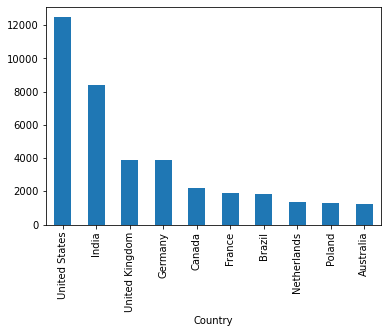

In [12]:
Top_countries = data.value_counts('Country').head(10)
Top_countries.plot(kind = 'bar')

In [13]:
questions.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [14]:
data.drop(data[(data.Age <10)].index, inplace = True)
data.drop(data[(data.Age > 100)].index, inplace = True)

In [15]:
data.Age.describe()

count    45436.000000
mean        30.834294
std          9.506982
min         10.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

(array([  210.,  2442.,  9211., 12057.,  8808.,  5625.,  3048.,  1766.,
         1041.,   623.,   334.,   145.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

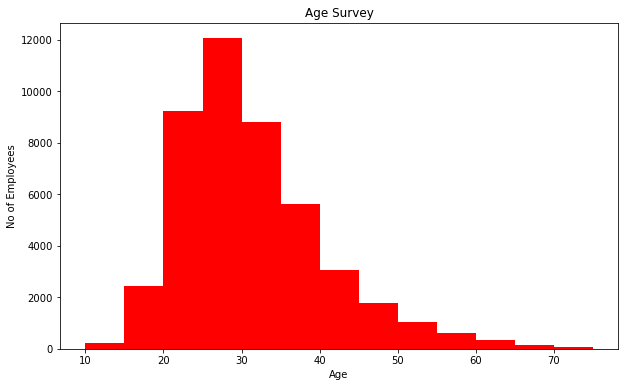

In [16]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.figure(figsize= (10,6))
plt.xlabel('Age')
plt.ylabel('No of Employees')
plt.title('Age Survey')
plt.hist(data.Age, bins = np.arange(10,80,5), color = 'Red')

In [17]:
questions.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [18]:
data.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

Remove Multiple Gender Inputs with NAN value

In [19]:
import numpy as np
data.replace( to_replace= "Man;Non-binary, genderqueer, or gender non-conforming", value = np.nan, inplace = True )
data.replace( to_replace= "Woman;Non-binary, genderqueer, or gender non-conforming", value = np.nan, inplace = True )
data.replace( to_replace= "Woman;Man", value = np.nan, inplace = True )
data.replace( to_replace= "Woman;Man;Non-binary, genderqueer, or gender non-conforming", value = np.nan, inplace = True )

In [20]:
data.Gender.unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

In [21]:
Gender_types = data.Gender.value_counts(dropna = False)

([<matplotlib.patches.Wedge at 0x1edac7cea30>,
 [Text(-0.8090779149242299, 1.0175425925148591, 'Man'),
  Text(0.5837335184771015, -1.1615744398902481, 'nan'),
  Text(1.26727420079533, -0.2898553087293003, 'Woman'),
  Text(1.2997710902542947, -0.024394936752585514, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.4978941014918338, 0.626180056932221, '71.38%'),
  Text(0.3592206267551394, -0.7148150399324602, '22.06%'),
  Text(0.7798610466432798, -0.17837249767956942, '5.96%'),
  Text(0.7998591324641813, -0.015012268770821851, '0.60%')])

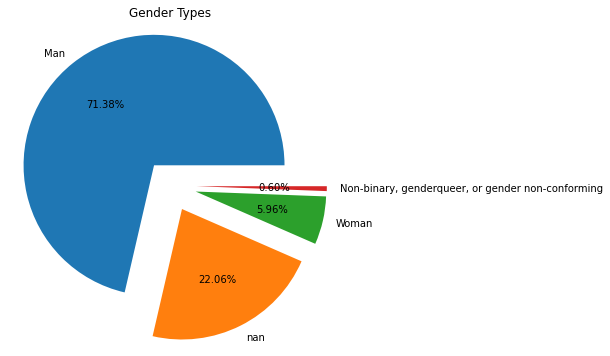

In [22]:
plt.figure(figsize= (12,6))
plt.title('Gender Types')
plt.pie(Gender_types,explode = (0.2,0.2,0.2, 0.2), labels = Gender_types.index, autopct = '%.2f%%')

In [23]:
questions.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [24]:
import seaborn as sns
data.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [25]:
Ed = data.EdLevel.value_counts(normalize = True)


<AxesSubplot:title={'center':'Percent Education'}, xlabel='EdLevel'>

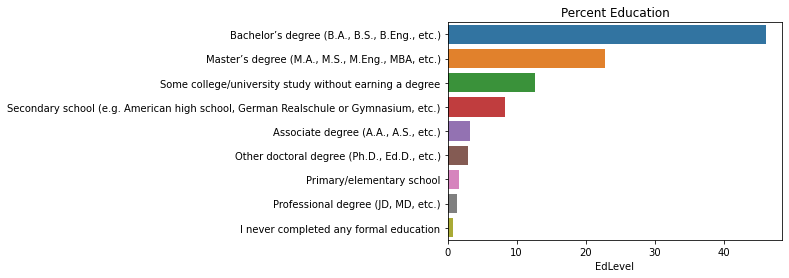

In [28]:
plt.title('Percent Education')
plt.xlabel('Percentage')
sns.barplot(y =Ed.index, x = Ed*100, hue =)

In [35]:
questions.UndergradMajor

'What was your primary field of study?'

In [36]:
data.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31576
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin